In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [56]:
df = pd.read_csv('../data_sets/nyc-parking-violations-2020.csv', 
                 usecols=['Plate ID', 'Registration State',  
                          'Vehicle Make', 'Vehicle Color', 
                          'Street Name'])

In [57]:
df['Vehicle Color'].value_counts().index 

Index(['WH', 'GY', 'BK', 'WHITE', 'BL', 'RD', 'BLACK', 'GREY', 'BROWN',
       'SILVE',
       ...
       'GEAY', 'M.GRE', 'WHTQ', 'STRLT', 'BLDG', 'RD-CH', 'ELK', 'WICK',
       'MARIO', 'CH'],
      dtype='object', name='Vehicle Color', length=1896)

In [58]:
len(df['Vehicle Color'].unique())

1897

In [59]:
len(df['Vehicle Color'].dropna().unique())

1896

In [25]:
colors =df['Vehicle Color'].dropna().value_counts().head(30).index.tolist()

In [60]:
colors[:30]

['WH',
 'GY',
 'BK',
 'WHITE',
 'BL',
 'RD',
 'BLACK',
 'GREY',
 'BROWN',
 'SILVE',
 'GR',
 'BLUE',
 'RED',
 'TN',
 'BR',
 'YW',
 'BLK',
 'OTHER',
 'GREEN',
 'GL',
 'GRY',
 'MR',
 'GRAY',
 'WHT',
 'YELLO',
 'WHI',
 'OR',
 'BK.',
 'WT',
 'WT.']

In [30]:
list_white = []
list_black = []
for color in colors:
    if color.startswith('W'):
        list_white.append(color)
    elif color.startswith('B'):
        list_black.append(color)
print(list_white)
print(list_black)

['WH', 'WHITE', 'WHT', 'WHI', 'WT', 'WT.']
['BK', 'BL', 'BLACK', 'BROWN', 'BLUE', 'BR', 'BLK', 'BK.']


In [48]:
list_black.pop(3)


'BR'

In [49]:
list_black

['BK', 'BL', 'BLACK', 'BLK', 'BK.']

In [51]:
dict_white = {x: 'White' for x in list_white}
dict_blck = {y: 'Black' for y in list_black}


In [38]:
import matplotlib.pyplot as plt

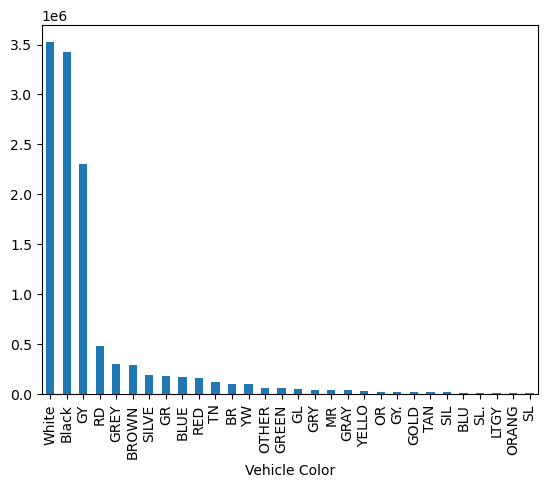

In [53]:
df['Vehicle Color'] = df['Vehicle Color'].replace(dict_white)
df['Vehicle Color'] = df['Vehicle Color'].replace(dict_blck)
df['Vehicle Color'].value_counts().head(30).plot(kind='bar')
plt.show()

In [54]:
len(df['Vehicle Color'].dropna().unique())

1885

# Beyond 1
### Run value_counts on the Vehicle Make column, and look at some vehicle names. (There are more than 5,200 distinct makes, which almost certainly indicates a lot of inconsistency in this data.) What problems do you see? Write a function that, given a value, cleans up the data: putting the name in all caps, removing punctuation, and standardizing whatever names you can. Then use the apply method to fix the column. How many distinct vehicle makes are there when you’re done?

In [67]:
df['Vehicle Make'].value_counts()

Vehicle Make
TOYOT    1396714
HONDA    1344479
FORD     1329491
NISSA    1121782
CHEVR     712494
          ...   
BONEE          1
AIFAP          1
GOMCY          1
PW             1
KASAK          1
Name: count, Length: 5001, dtype: int64

In [64]:
def names_standard(name):
    name = str(name)
    name = name.upper()
    name = name.replace(' ', '')
    name = name.replace('"', '')
    name = name.replace("'", '')
    name = name.replace('(', '')
    name = name.replace(')', '')
    name = name.replace('/', '')
    name = name.replace('-', '')
    name = name.replace('.', '')
    name = name.replace(',', '')
    name = name.replace('!', '')
    name = name.replace('?', '')
    name = name.replace(';', '')
    name = name.replace(':', '')
    name = name.replace('*', '')
    name = name.replace('+', '')
    return name

In [65]:
df['Vehicle Make'] = df['Vehicle Make'].apply(names_standard)
df['Vehicle Make'].value_counts().head(30)

Vehicle Make
TOYOT    1396714
HONDA    1344479
FORD     1329491
NISSA    1121782
CHEVR     712494
FRUEH     530846
MEBE      530474
JEEP      491419
BMW       488571
DODGE     463326
HYUND     358350
LEXUS     294152
ACURA     248228
INTER     231149
INFIN     230732
GMC       214341
SUBAR     206701
VOLKS     193049
AUDI      182417
HIN       181538
KIA       163209
CHRYS     153449
ISUZU     146876
MAZDA     141305
ROVER     102892
CADIL     102404
MITSU      95000
VOLVO      92200
NSOT       86826
LINCO      81458
Name: count, dtype: int64

In [66]:
len(df['Vehicle Make'].value_counts())

5001

# Beyond 2
### How standardized are the street names in the data set? What changes could you apply to improve things?

In [70]:
df['Street Name'].value_counts().head(30)


Street Name
Broadway                180225
3rd Ave                 133003
5th Ave                  78211
2nd Ave                  75533
Madison Ave              75419
Lexington Ave            62859
1st Ave                  58491
Queens Blvd              58423
8th Ave                  54641
WB ATLANTIC AVE @ CL     54298
WB SEAGIRT BLVD @ CR     53142
7th Ave                  51583
6th Ave                  50750
EB HORACE HARDING EX     50263
Amsterdam Ave            46657
EB CONDUIT BLVD @ GL     46185
SB MAIN ST @ 82ND DR     45274
NB SPRINGFIELD BLVD      44446
Jamaica Ave              42859
EB E 233RD ST @ KATO     42727
37th Ave                 39865
Park Ave                 36140
WB ATLANTIC AVE @ SH     34989
Roosevelt Ave            34702
WB GOETHALS RD N @ J     34210
WB LINDEN BLVD @ LIN     34187
SB FRANCIS LEWIS BLV     34026
Fulton St                33491
EB HILLSIDE AVE @ 25     33382
Columbus Ave             32971
Name: count, dtype: int64

In [76]:
def street_clean(street):
    street = str(street)
    street = street.upper()
    street = street.replace('@',  '')
    street = street.replace('"', '')
    street = street.replace("'", '')
    street = street.replace('(', '')
    street = street.replace(')', '')
    street = street.replace('/', '')
    street = street.replace('-', '')
    return street 

In [77]:
df['Street Name'] = df['Street Name'].apply(street_clean)
df['Street Name'].value_counts().head(30)
len(df['Street Name'].value_counts())


52990

In [78]:
df['Street Name'].value_counts().head(30)

Street Name
BROADWAY                190996
3RD AVE                 138783
5TH AVE                  83112
MADISON AVE              81358
2ND AVE                  79728
LEXINGTON AVE            69386
1ST AVE                  61913
QUEENS BLVD              60017
8TH AVE                  59756
6TH AVE                  55400
7TH AVE                  55070
WB ATLANTIC AVE  CL      54298
WB SEAGIRT BLVD  CR      53142
EB HORACE HARDING EX     50263
AMSTERDAM AVE            47967
EB CONDUIT BLVD  GL      46185
JAMAICA AVE              45430
SB MAIN ST  82ND DR      45274
NB SPRINGFIELD BLVD      44447
EB E 233RD ST  KATO      42727
PARK AVE                 40645
37TH AVE                 39959
ROOSEVELT AVE            36141
FULTON ST                35854
WB ATLANTIC AVE  SH      34989
WB GOETHALS RD N  J      34210
WHITE PLAINS RD          34189
WB LINDEN BLVD  LIN      34187
SB FRANCIS LEWIS BLV     34026
EB HILLSIDE AVE  25      33382
Name: count, dtype: int64

# Beyond 3
### Would you need to clean up the Registration State column? Why or why not?

In [82]:
df['Registration State'].value_counts()

Registration State
NY    9753643
NJ    1096110
PA     338779
FL     174056
CT     165205
       ...   
PE         18
SK          8
MX          7
NT          3
YT          2
Name: count, Length: 68, dtype: int64